# Método dos momentos - Capacitor Planar



Neste notebook será descrito como utilizar o algoritmo do método dos momentos para calcular as concentrações de carga em uma placa sujeita a uma tensão V0 seguindo as especificações mostradas.

o nosso objetivo é partir da equação para potencial elétrico:

$$ V(r) = \frac{1}{4 \piϵ} ∫∫\frac{ρ_s(r)}{|r - r'|}ds' $$

determinamos ρ atraves da aproximação

$$ \rho(x,y) = ∑a_n P_n(x,y) $$

onde $a_n$ são os coeficientes que determinaremos atraves do método dos momentos. 

Primeiramente importamos as bibliotecas math, numpy e matplotlib. Para funções matemáticas e plotar gráficos.


Tambe é definido os valores para o comprimento L da placa e o N.

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt


L = 10
n = 10
delta = L / n

V0 = 1.0
e0 = 8.854 * 1e-12

definimos os centros dos quadrados de forma ordenada com a função centers(). os vetores rn e rm serão gerados por essa função.

In [ ]:
def centers(L, n):
  delta = L/n
  rn  = []
  for i in range(1, n +1):
    for j in range(1, n+1):
      rn.append( [ delta*j - delta*0.5 ,  delta*i - delta*0.5 ] )
  return rn

rn = np.array(centers(L,n))
print(rn.shape)
print(rn)

(100, 2)
[[0.5 0.5]
 [1.5 0.5]
 [2.5 0.5]
 [3.5 0.5]
 [4.5 0.5]
 [5.5 0.5]
 [6.5 0.5]
 [7.5 0.5]
 [8.5 0.5]
 [9.5 0.5]
 [0.5 1.5]
 [1.5 1.5]
 [2.5 1.5]
 [3.5 1.5]
 [4.5 1.5]
 [5.5 1.5]
 [6.5 1.5]
 [7.5 1.5]
 [8.5 1.5]
 [9.5 1.5]
 [0.5 2.5]
 [1.5 2.5]
 [2.5 2.5]
 [3.5 2.5]
 [4.5 2.5]
 [5.5 2.5]
 [6.5 2.5]
 [7.5 2.5]
 [8.5 2.5]
 [9.5 2.5]
 [0.5 3.5]
 [1.5 3.5]
 [2.5 3.5]
 [3.5 3.5]
 [4.5 3.5]
 [5.5 3.5]
 [6.5 3.5]
 [7.5 3.5]
 [8.5 3.5]
 [9.5 3.5]
 [0.5 4.5]
 [1.5 4.5]
 [2.5 4.5]
 [3.5 4.5]
 [4.5 4.5]
 [5.5 4.5]
 [6.5 4.5]
 [7.5 4.5]
 [8.5 4.5]
 [9.5 4.5]
 [0.5 5.5]
 [1.5 5.5]
 [2.5 5.5]
 [3.5 5.5]
 [4.5 5.5]
 [5.5 5.5]
 [6.5 5.5]
 [7.5 5.5]
 [8.5 5.5]
 [9.5 5.5]
 [0.5 6.5]
 [1.5 6.5]
 [2.5 6.5]
 [3.5 6.5]
 [4.5 6.5]
 [5.5 6.5]
 [6.5 6.5]
 [7.5 6.5]
 [8.5 6.5]
 [9.5 6.5]
 [0.5 7.5]
 [1.5 7.5]
 [2.5 7.5]
 [3.5 7.5]
 [4.5 7.5]
 [5.5 7.5]
 [6.5 7.5]
 [7.5 7.5]
 [8.5 7.5]
 [9.5 7.5]
 [0.5 8.5]
 [1.5 8.5]
 [2.5 8.5]
 [3.5 8.5]
 [4.5 8.5]
 [5.5 8.5]
 [6.5 8.5]
 [7.5 8.5]
 [8.5 8.5]
 [9.5 8.5]
 

a matriz de impedância será gerada pela função abaixo. ela recebe rn e usa as formulas descritas no slides para gerar a matriz de impedancia de formato NxN.

se m $\neq$ n
$$ Z_{mn} = \frac{1}{4\piϵ}  \frac{Δ²}{ \sqrt{(x_p - x_i)² + (y_q - y_j)²} } $$

se m = n
$$ Z_{mn} = \frac{Δ}{\piϵ} ln( 1 + \sqrt{2}) $$

In [ ]:
def impedance_matrix( rn, N, Delta ):
  epsilon0 = e0
  matrix = []
  for m in range(0 , N**2 ):
    line = []
    for n in range(0 , N**2 ):
      
      if n == m:
          zmn = (delta/(math.pi * epsilon0))*(math.log(1 + math.sqrt(2)))
          line.append(zmn)
      else:        
          zmn = 1/(4 * math.pi * epsilon0) * math.pow(Delta, 2)/math.sqrt(math.pow(rn[m][0] - rn[n][0], 2) + math.pow( rn[m][1] - rn[n][1], 2) )
          line.append(zmn)

    matrix.append(line)
  return matrix



rn = centers(L, n)
rm = centers(L, n)

Zmn = np.array( impedance_matrix(rn, n, delta))

print(Zmn.shape)
print(Zmn)


(100, 100)
[[3.16862352e+10 8.98774244e+09 4.49387122e+09 ... 7.88277158e+08
  7.46391384e+08 7.06143736e+08]
 [8.98774244e+09 3.16862352e+10 8.98774244e+09 ... 8.30917082e+08
  7.88277158e+08 7.46391384e+08]
 [4.49387122e+09 8.98774244e+09 3.16862352e+10 ... 8.72966716e+08
  8.30917082e+08 7.88277158e+08]
 ...
 [7.88277158e+08 8.30917082e+08 8.72966716e+08 ... 3.16862352e+10
  8.98774244e+09 4.49387122e+09]
 [7.46391384e+08 7.88277158e+08 8.30917082e+08 ... 8.98774244e+09
  3.16862352e+10 8.98774244e+09]
 [7.06143736e+08 7.46391384e+08 7.88277158e+08 ... 4.49387122e+09
  8.98774244e+09 3.16862352e+10]]


a proximo codigo gera a matriz V de tensões

In [ ]:
def tension(V0, n):
  return np.full(n**2 , 2*e0*V0)

v= np.array(tension(V0, n))
print(v.shape)
print(v)

(100,)
[1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11
 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11 1.7708e-11

uma vez com as matrizes Z e V resolvemos o sistema linear apara obter os coeficientes.

In [ ]:
coeficients = np.linalg.solve(Zmn, v)
print(coeficients.shape)
print(coeficients)



(100,)
[1.78371050e-22 1.17817841e-22 1.07779552e-22 1.02815456e-22
 1.00771534e-22 1.00771534e-22 1.02815456e-22 1.07779552e-22
 1.17817841e-22 1.78371050e-22 1.17817841e-22 6.02602728e-23
 5.31058925e-23 4.97343886e-23 4.84146251e-23 4.84146251e-23
 4.97343886e-23 5.31058925e-23 6.02602728e-23 1.17817841e-22
 1.07779552e-22 5.31058925e-23 4.58347233e-23 4.24473502e-23
 4.11327223e-23 4.11327223e-23 4.24473502e-23 4.58347233e-23
 5.31058925e-23 1.07779552e-22 1.02815456e-22 4.97343886e-23
 4.24473502e-23 3.90441471e-23 3.77209021e-23 3.77209021e-23
 3.90441471e-23 4.24473502e-23 4.97343886e-23 1.02815456e-22
 1.00771534e-22 4.84146251e-23 4.11327223e-23 3.77209021e-23
 3.63909987e-23 3.63909987e-23 3.77209021e-23 4.11327223e-23
 4.84146251e-23 1.00771534e-22 1.00771534e-22 4.84146251e-23
 4.11327223e-23 3.77209021e-23 3.63909987e-23 3.63909987e-23
 3.77209021e-23 4.11327223e-23 4.84146251e-23 1.00771534e-22
 1.02815456e-22 4.97343886e-23 4.24473502e-23 3.90441471e-23
 3.77209021e-23 3

o codigo abaixo plota a distribuição de carga que achamos anteriormente.

(100,)
[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]
Z [1.78371050e-22 1.17817841e-22 1.07779552e-22 1.02815456e-22
 1.00771534e-22 1.00771534e-22 1.02815456e-22 1.07779552e-22
 1.17817841e-22 1.78371050e-22]
(10, 10)


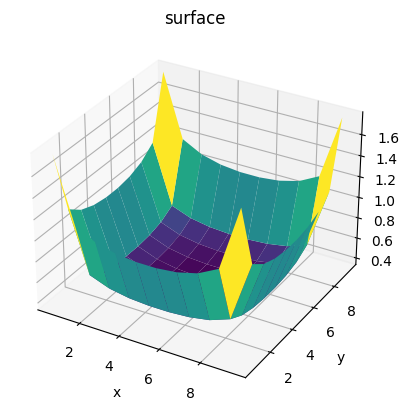

In [ ]:

print(coeficients.shape)

x = np.linspace( delta/2 , L -(delta/2) , n)
print(x)
X, Y = np.meshgrid( x, x)

Z = np.reshape(coeficients, (n,n)) 

print("Z",Z[0]) 
print(X.shape)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(0, 0)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


fizemos uma função plot com todas as funções definidas anteriormente e recebe os valores de L,n, V0 e já printa o gráfico 3d com as distribuições de carga. 

Usamos um loop para vermos como a carga se distribui para valores de n=10...100.

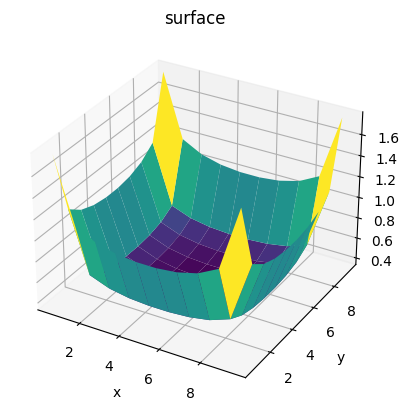

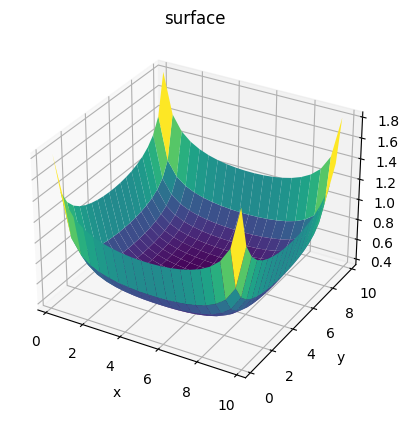

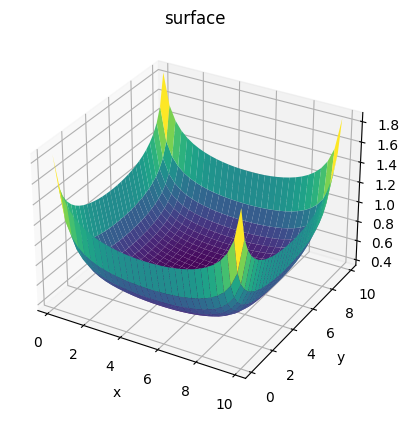

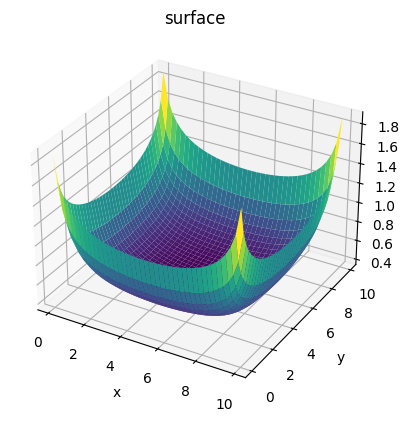

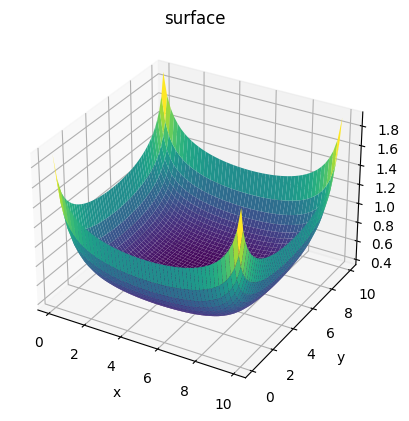

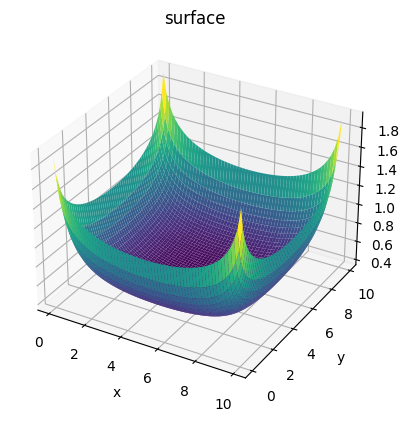

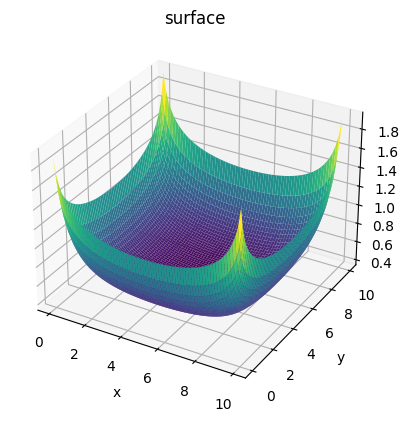

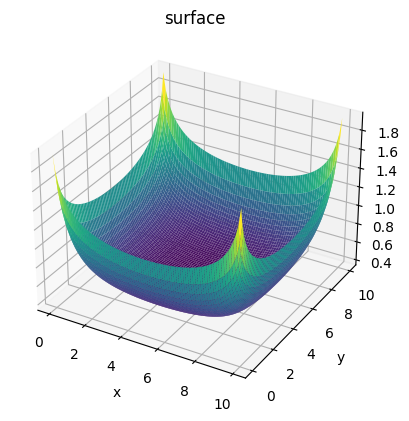

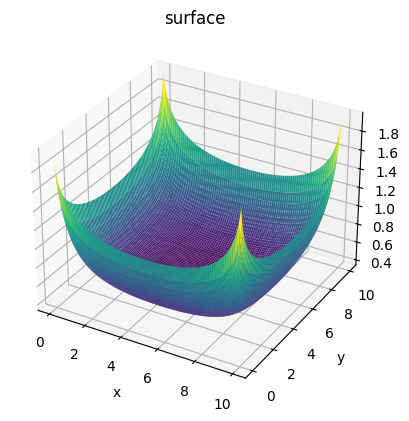

In [ ]:
def plot(L,n,v0):
  delta = L/n
  rn = np.array(centers(L,n))
  Zmn = np.array( impedance_matrix(rn, n, delta))
  v= np.array(tension(V0, n))
  coeficients = np.linalg.solve(Zmn, v)

  x = np.linspace( delta/2 , L -(delta/2) , n)
  
  X, Y = np.meshgrid( x, x)

  Z = np.reshape(coeficients, (n,n)) 

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.view_init(0, 0)

  ax = plt.axes(projection='3d')
  ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none')
  ax.set_title('surface');

  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');

#plot(10,40,1)

for i in range(0,9):
  plot(10 , 10 + i*10, 1)